In [1]:
import tensorflow as tf

import tensorflow_datasets as tsds


/Users/gonzalolopez/Reppos/python_ia/python_ia/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
datos, metadatos = tsds.load("cats_vs_dogs", as_supervised=True, with_info=True)

In [3]:
metadatos

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/Users/gonzalolopez/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, 

2024-06-19 23:33:50.882601: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


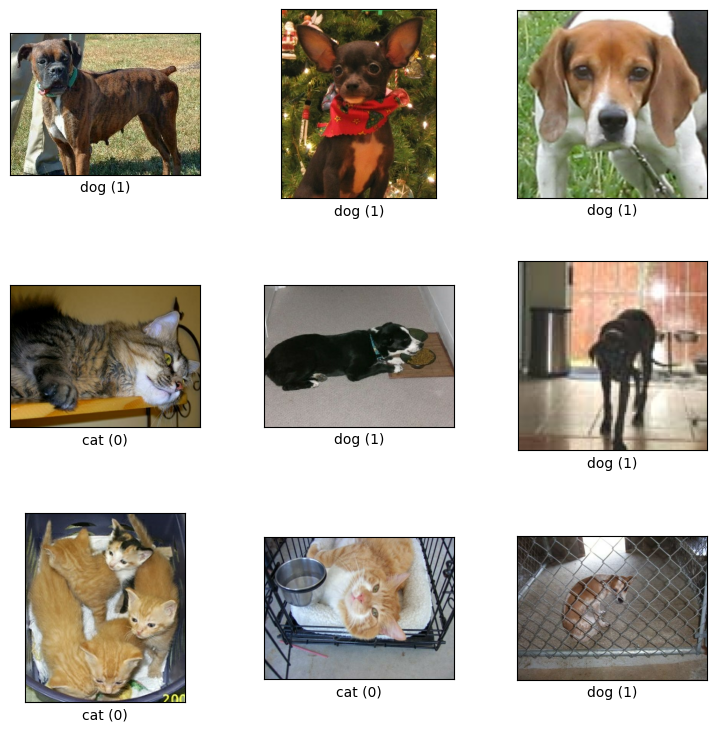

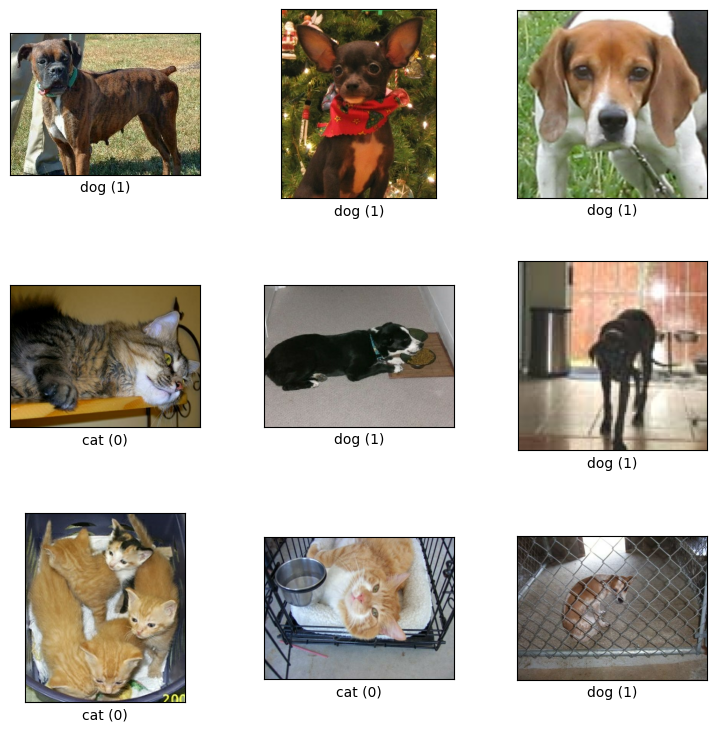

In [4]:
tsds.show_examples(datos["train"], metadatos)

2024-06-19 23:34:15.276113: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


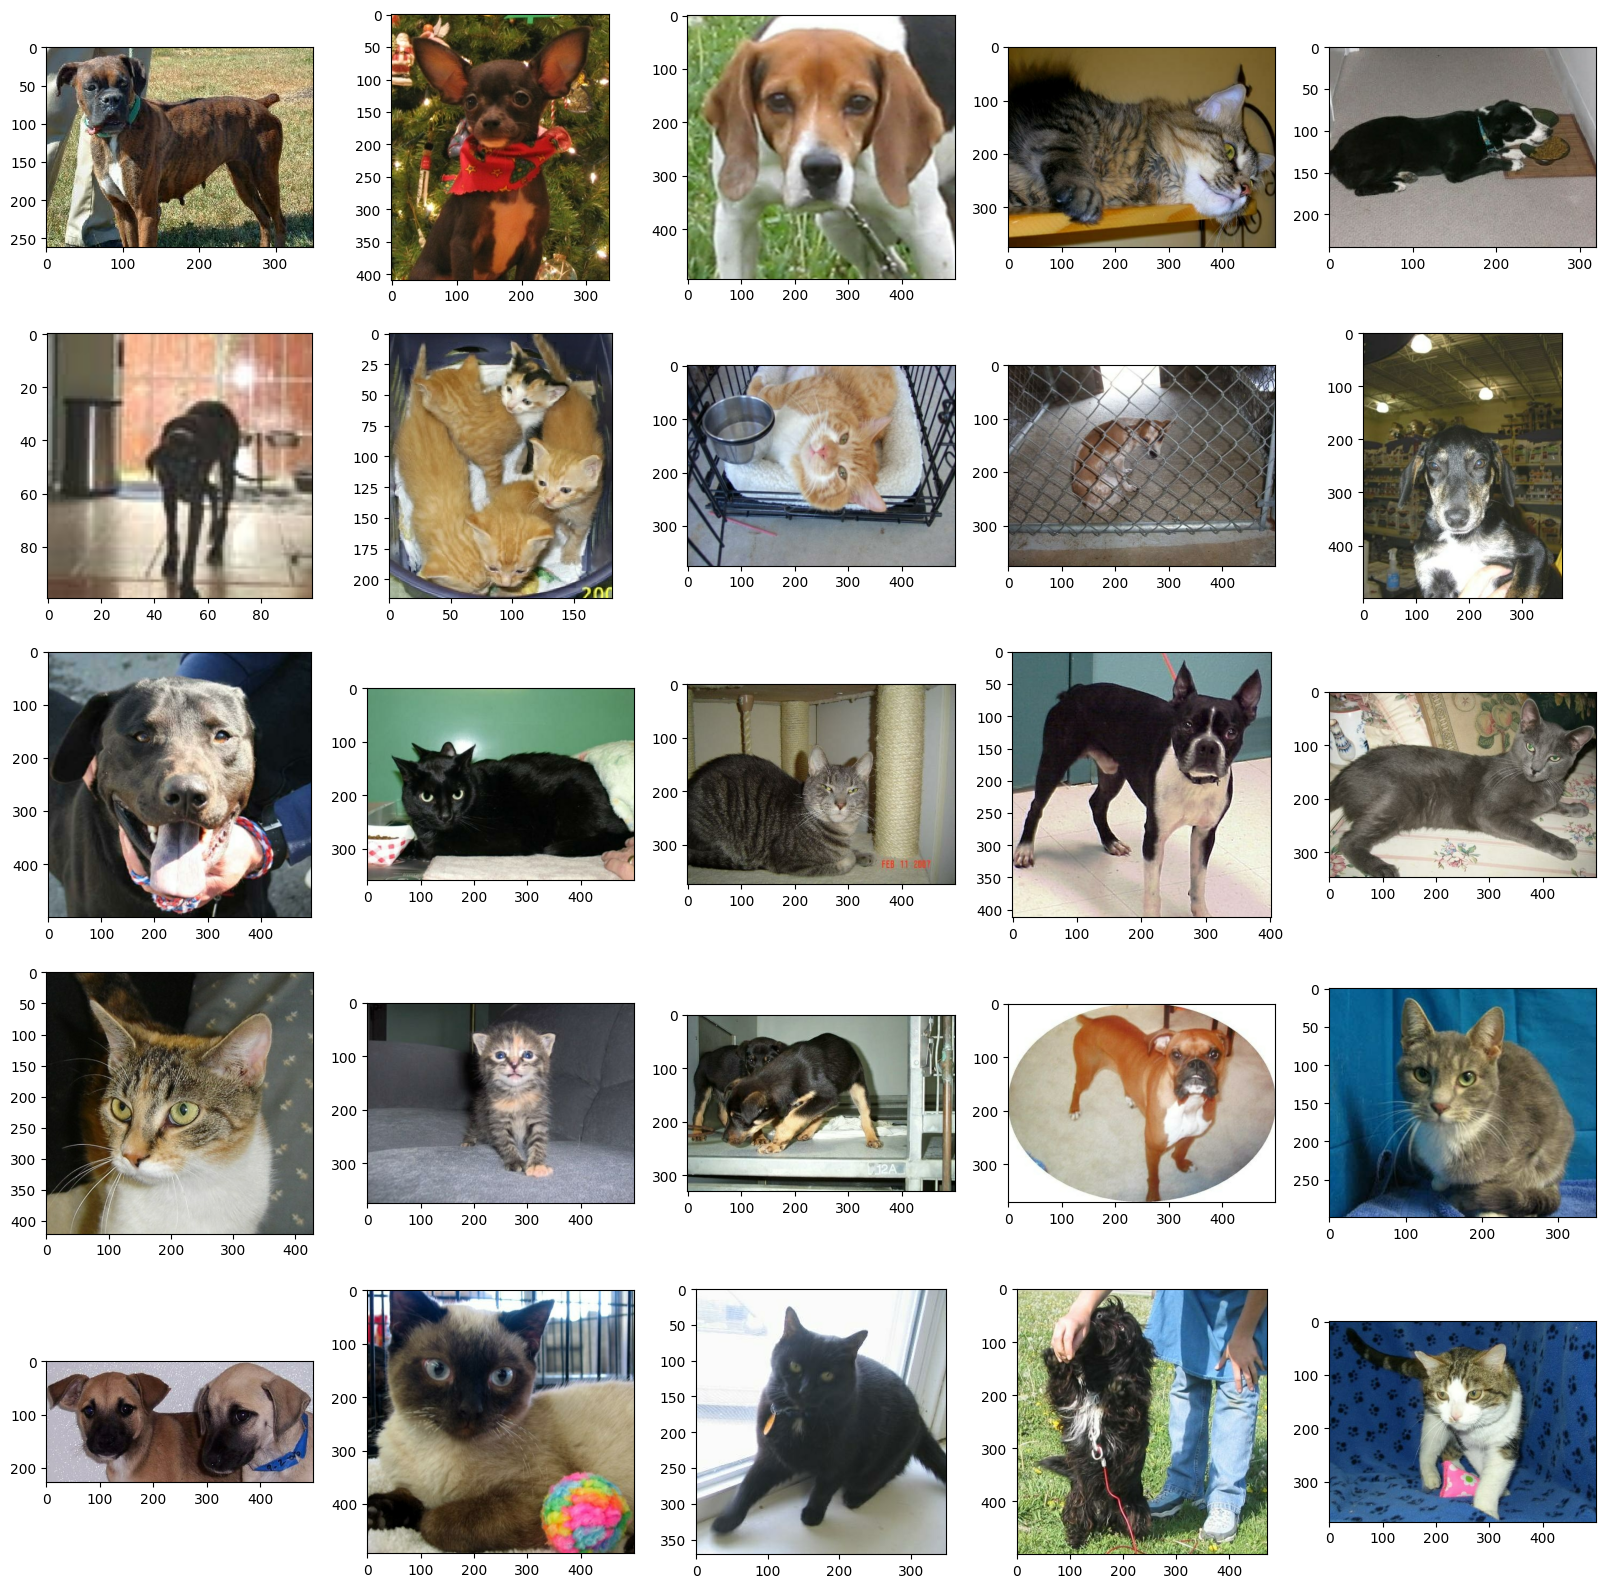

In [5]:
import matplotlib.pyplot as plt
import cv2 #opencv

plt.figure(figsize=(20,20))

TAMANO_IMG = 100

for i, (imagen, etiqueta) in enumerate(datos["train"].take(25)):
    plt.subplot(5,5,i+1)
    plt.imshow(imagen)

2024-06-19 23:36:09.855296: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


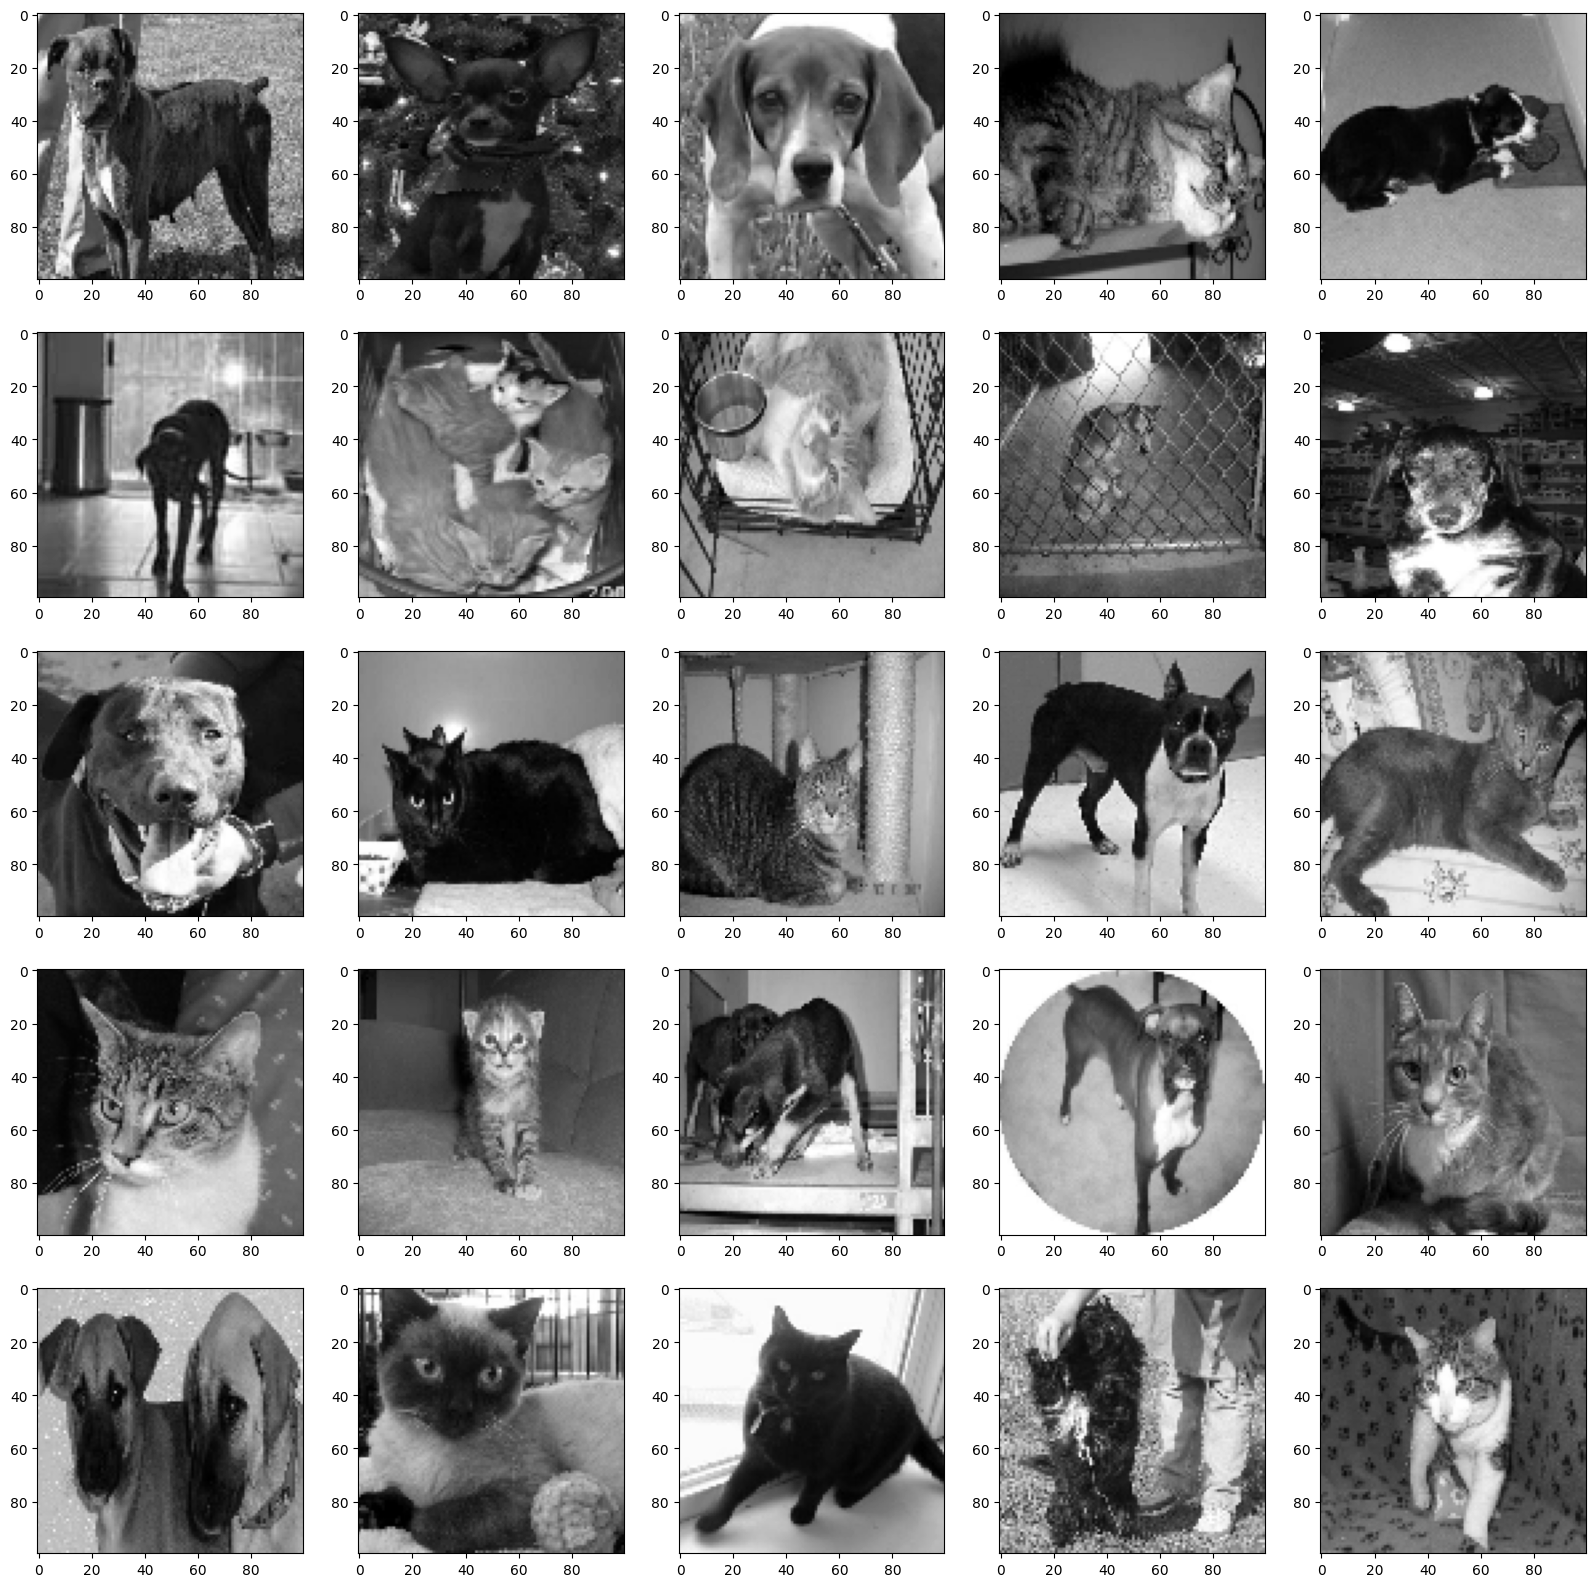

In [6]:
import matplotlib.pyplot as plt
import cv2 #opencv

plt.figure(figsize=(20,20))

TAMANO_IMG = 100

for i, (imagen, etiqueta) in enumerate(datos["train"].take(25)):
    imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    plt.subplot(5,5,i+1)
    plt.imshow(imagen, cmap="gray")

In [7]:
datos_entrenamiento = []

In [8]:
for i, (imagen, etiqueta) in enumerate(datos["train"]):
    imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1)
    datos_entrenamiento.append([imagen, etiqueta])

2024-06-19 23:38:14.932099: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [9]:
len(datos_entrenamiento)

23262

In [10]:
X = []
y = []

for imagen, etiqueta in datos_entrenamiento:
    X.append(imagen)
    y.append(etiqueta)


In [11]:
#normalizar imagenes
import numpy as np

X = np.array(X).astype(float) / 255


In [13]:
y = np.array(y)

In [14]:
y

array([1, 1, 1, ..., 0, 1, 0])

In [15]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

/Users/gonzalolopez/Reppos/python_ia/python_ia/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
modelo.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [17]:
modelo.fit(
    X, y, batch_size=32, validation_split=0.15, epochs=50
)

Epoch 1/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 61s 98ms/step - accuracy: 0.5841 - loss: 0.6614 - val_accuracy: 0.7140 - val_loss: 0.5649
Epoch 2/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 67s 109ms/step - accuracy: 0.7438 - loss: 0.5174 - val_accuracy: 0.7777 - val_loss: 0.4771
Epoch 3/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 75s 121ms/step - accuracy: 0.7902 - loss: 0.4484 - val_accuracy: 0.7788 - val_loss: 0.4722
Epoch 4/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 75s 121ms/step - accuracy: 0.8186 - loss: 0.3992 - val_accuracy: 0.8155 - val_loss: 0.4105
Epoch 5/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 76s 123ms/step - accuracy: 0.8415 - loss: 0.3540 - val_accuracy: 0.8152 - val_loss: 0.4034
Epoch 6/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 76s 124ms/step - accuracy: 0.8629 - loss: 0.3094 - val_accuracy: 0.8292 - val_loss: 0.3889
Epoch 7/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 76s 122ms/step - accuracy: 0.8913 - loss: 0.2647 - val_accuracy: 0.8307 - val_loss: 0.3922
Epoch 8/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 75s 122ms/step - accuracy: 0.9163 - loss: 0.

OVerfiting
accuraccy > val_accuracy
estå sobreentrenada, los datos de entrenamiento tinen menor precisión que los de entrenamiento.
Técnicas para mejorar esto:
- Dropout: apaga algunas neuronas en cada época
- Data augmentation: transforma las imágenes mientras entrena

